In [98]:
# Librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# librerias que le pertenecen a sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
# Cargando el archivo y agregando el nombre a cada columna
df = pd.DataFrame(np.load("proyecto_training_data.npy")\
                  ,columns = ['sale_price','overallquial','stfloor_square','room','year_built','lot_frontage'])

In [3]:
# Verificando el tipo de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sale_price      1460 non-null   float64
 1   overallquial    1460 non-null   float64
 2   stfloor_square  1460 non-null   float64
 3   room            1460 non-null   float64
 4   year_built      1460 non-null   float64
 5   lot_frontage    1201 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


In [4]:
# explorando los datos que LotFrontage: Linear feet of street connected to property tienen datos vacíos
# se procedio a colocar la media aritmetica
df['lot_frontage'] = df['lot_frontage'].fillna( df['lot_frontage'].mean() )
df['lot_frontage'] = df['lot_frontage'].astype(int)
df['year_built'] = df['year_built'].astype(int)
df["valor1"] = 1
                                               

### **Separando los datos 80% entrenamiento y 20% prueba**

##### forma 1 de separar los datos

In [5]:
#### este es un ejemplo de separar los datos, pero no se utilizará aquí.
aleatorios_ = np.random.rand(len(df)) <= 0.80
entrenamiento_ = df[aleatorios]
prueba_ = df[~aleatorios]

##### forma 2 de separar los datos

In [6]:
X = df.iloc[:,1:].values # seleccionando las variables independientes
y = df.iloc[:,:1].values # seleccionando la variable dependiente

In [7]:
# Obteniendo el 80% para el entrenamiento y el 20% prueba
X_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(X,y, test_size= 0.2 , random_state = 0 )

##### Resumen de los resultados (con los datos de entrenamiento)

In [8]:
# obteniendo la media, desviación estandar, valor minimo y máximo, el primer, segundo y tercer cuartil
df_entrenamiento = (pd.DataFrame(X_entrenamiento)).rename(columns= {0:'overallquial',1:'stfloor_square',2:'room',3:'year_built',4:'lot_frontage' })
print(df_entrenamiento.describe())

       overallquial  stfloor_square         room   year_built  lot_frontage  \
count   1168.000000     1168.000000  1168.000000  1168.000000   1168.000000   
mean       6.086473     1160.958904     6.544521  1970.890411     69.684075   
std        1.367472      373.315037     1.624493    30.407486     20.758010   
min        1.000000      334.000000     2.000000  1872.000000     21.000000   
25%        5.000000      884.000000     5.000000  1953.750000     60.000000   
50%        6.000000     1092.000000     6.000000  1972.000000     70.000000   
75%        7.000000     1389.250000     7.000000  2000.000000     79.000000   
max       10.000000     3228.000000    14.000000  2010.000000    313.000000   

            5  
count  1168.0  
mean      1.0  
std       0.0  
min       1.0  
25%       1.0  
50%       1.0  
75%       1.0  
max       1.0  


In [9]:
# Rango
print(df_entrenamiento.max(axis= 0) - df_entrenamiento.min(axis= 0))

overallquial         9.0
stfloor_square    2894.0
room                12.0
year_built         138.0
lot_frontage       292.0
5                    0.0
dtype: float64


##### Histogramas (de las variables)
> Observando cada una de las variables en estudio, en donde se concentran los datos, es decir 
> la normalidad de cada variable

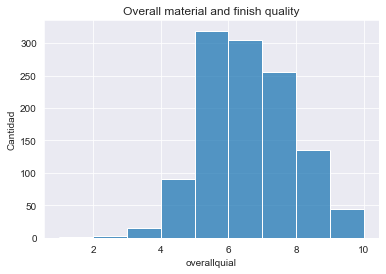

In [10]:
sns.set_style("darkgrid")
hist1 = sns.histplot(data= df_entrenamiento , x="overallquial",binwidth = 1)
hist1.set_title("Overall material and finish quality")
hist1.set(ylabel="Cantidad")
plt.show()

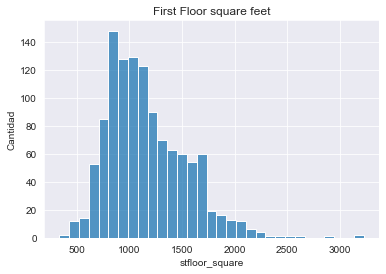

In [11]:
sns.set_style("darkgrid")
hist2 = sns.histplot(data= df_entrenamiento , x="stfloor_square")
hist2.set_title("First Floor square feet")
hist2.set(ylabel="Cantidad")
plt.show()

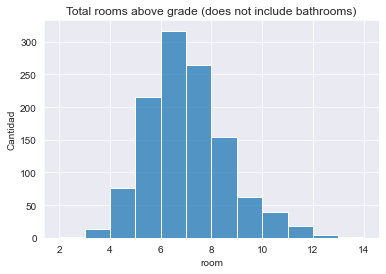

In [12]:
sns.set_style("darkgrid")
hist3 = sns.histplot(data= df_entrenamiento , x="room", binwidth= 1)
hist3.set_title("Total rooms above grade (does not include bathrooms)")
hist3.set(ylabel="Cantidad")
plt.show()

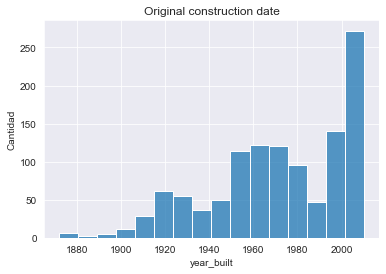

In [13]:
sns.set_style("darkgrid")
hist3 = sns.histplot(data= df_entrenamiento , x="year_built")
hist3.set_title("Original construction date")
hist3.set(ylabel="Cantidad")
plt.show()


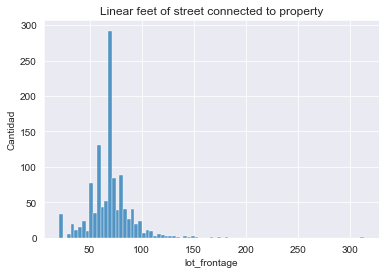

In [14]:
sns.set_style("darkgrid")
hist3 = sns.histplot(data= df_entrenamiento , x="lot_frontage")
hist3.set_title("Linear feet of street connected to property")
hist3.set(ylabel="Cantidad")
plt.show()


##### funcion para los coeficiente de correlación de cada una de las variables

In [15]:

def coeficiente_correlacion(matriz_y, matriz_x):
    """ Función que genera el coeficiente de correlación entre las variables en estudio """
    lista = ['overallquial','stfloor_square','room','year_built','lot_frontage']
    coeficiente = []
    for i in range(0,len(matriz_x[0])-1):
        coef = np.corrcoef(matriz_y[:,0],matriz_x[:,i])
        a = ("Correlación entre sales_price y "+ str(lista[i])+" "+ str(round ((coef[0][1]),3) ))
        coeficiente.append(str(a))
    return coeficiente

In [16]:
# Coeficiente de correlación
coeficiente_correlacion(y_entrenamiento,X_entrenamiento)

['Correlación entre sales_price y overallquial 0.791',
 'Correlación entre sales_price y stfloor_square 0.621',
 'Correlación entre sales_price y room 0.543',
 'Correlación entre sales_price y year_built 0.521',
 'Correlación entre sales_price y lot_frontage 0.341']

##### Función para las gráficas de dispersión
> La gráfica de dispersión permite detectar patrones o relaciones entre las dos variables. Si los puntos están muy dispersos, esto sugiere que no hay una relación fuerte entre las dos variables. Si los puntos están dispuestos en una línea o en una forma no lineal, esto sugiere que hay una relación entre las dos variables.

In [17]:
def scatter(variable_x, coeficiente=0):
    """ Función que realiza el gráfico de dispersión  """
    plt.scatter(x = df_entrenamiento[[variable_x]], y= pd.DataFrame(y_entrenamiento),color = 'red')
    plt.title("sales price and"+" "+variable_x+" / "+ "coef. correlación ="+coeficiente_correlacion(y_entrenamiento,X_entrenamiento)[coeficiente][-5:]   )
    plt.xlabel(variable_x)
    plt.ylabel("Sales price")
    return plt.show()

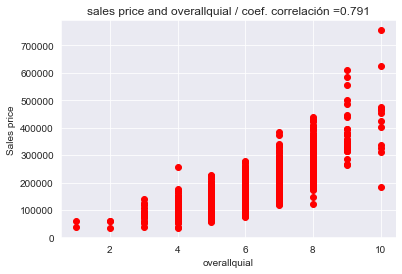

In [18]:
scatter('overallquial') 

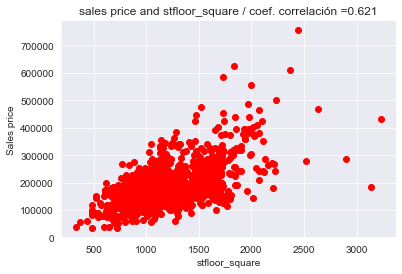

In [19]:
scatter('stfloor_square',1)

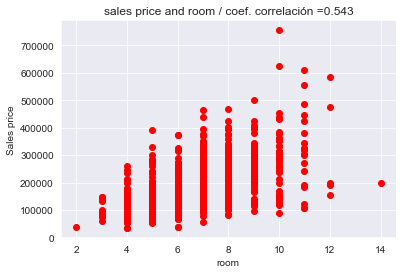

In [20]:
scatter('room',2)

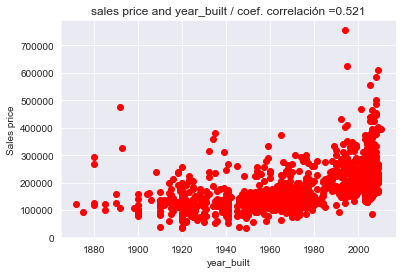

In [21]:
scatter('year_built',3)

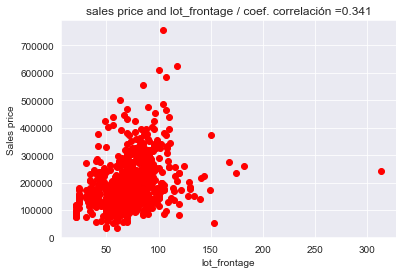

In [22]:
scatter('lot_frontage',4)


## <center> Regresión lineal   

### <center> ${y = \beta_0 + \beta_1 X}  $

##### Ecuación de la línea recta

###  ${y = \beta_0 + \beta_1 X}  $
En la regresión lineal, la ecuación de la línea recta se utiliza para modelar la relación entre las variables independientes y dependientes. 

Hay diferentes formas de calcular la regresión lineal matemáticamente y en esta ocasión se muestra por medio de matrices de la siguiente manera:

$\hat{\beta}= (X'X)^{-1} X'Y$

> 1. $ {\beta} $ = es un vector de coeficientes de la regresión lineal
> 2. $ {x} $ = es una matriz de valores de variables independientes, donde cada fila representa una observación y cada columna representa una variable independiente
> 3. $ {y} $ = es un vector de valores de la variable dependiente
> 4. $ {x}^T $ = es la matriz transpuesta de X
> 5. $ ({x}^T {x})^-1 $ = es la matriz inversa de la matriz producto de $ {x}^T y {x} $

In [23]:
# en este ejemplo se muestra como atraves del comando polyfit de numpy se puede calcular la regresion lineal, 
#  
X_ = X_entrenamiento[:,0]
Y_ = y_entrenamiento[:,0]
coefficients = np.polyfit(X_, Y_, deg=1)
print(" coeficientes de la regresion: " + "beta0 : "+ str(coefficients[1])+"   beta1 "+str(coefficients[0]) )


 coeficientes de la regresion: beta0 : -95435.30933266178   beta1 45386.58535666751


> donde:
> 1. ${y}$ es el precio de la vivienda (la variable dependiente)
> 2. ${x}$ es Calidad general de materiales y acabados de la vivienda (variable independiente)

##### Función de costo o pérdida
Mide el error promedio de los datos sin procesar (originales) y los datos estimados a partir de la regresion


##### Error cuadrático medio
El ECM representa el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales de la variable dependiente.

$ {ECM} = \frac{1}{N} \sum{i=1}^2 ({y_i}- \hat{y})^2 =   {ECM} = \frac{1}{N}  \sum_{i=1}^N  (y_i - \beta_0 - \beta_1 X_1)^2  $

donde:

> 1. $ {n} $ es el número de observaciones
> 2. $ {y} $ es el valor real de la variable dependiente
> 3. $ \hat{y}$ es el valor predicho de la variable dependiente


#### El gradiente descendiente
##### En los modelos de machine learning se utilizan para  minimizar el error cuadrático medio

$ \frac{\delta e}{\delta \beta_1} = \frac{1}{n}  \sum_{i=0}^N ((\hat{y} - y)* x) $

$ \frac{\delta e}{\delta \beta_0} = \frac{1}{n}  \sum_{i=0}^N ((\hat{y} - y)) $

##### Entonces la deriva de cada una es


$ \beta_0 = - \frac{2}{N} \sum_{i=1}^N (y_i - \beta_1 x - \beta_0) = {\beta_0}^i+1 = {\beta_0}^i -{\alpha} * \frac{\delta e}{\delta \beta_1} $ 

$ \beta_1 = - \frac{2}{N} \sum_{i=1}^N x(y_i - \beta_1 x - \beta_0)  =   {\beta_1}^i+1 = {\beta_1}^i -{\alpha} * \frac{\delta e}{\delta \beta_1}    $ 


#### Implementación de la regresión lineal en python

In [49]:

def pasos(epocas_, learning_rate,iteracion_epocas , x ,y  ):
    """Función que realiza el modelo predictivo de la regresión lineal simple """
    
    #función de la regresión lineal
    def regresion(beta0,beta1,x):
        """Función de la recta del modelo """
        return  beta0 + beta1*x
    #función del cálculo del error
    def _error(y,y_estimada):
        """Función para obtener el error del modelo """
        N = y.shape[0] # N es el tamaño del dataseto o de las observaciones
        error = np.sum((y-y_estimada)**2)/N
        return error
    
    # Funcion del descenso del gradiente
    def g_descendiente(w_, b_, alfa, x, y):
        """ Función del descenso del gradiente, """
    # El alfa es el learning rate que se elige, es decir el porcentaje de como cambia o se actualiza los pesos en cada iteración
        N = x.shape[0]     # donde N son los datos del modelo

    # Calculando las derivadas del gradiente descendiente que permite minimizar la pérdida del Error Cuadrático Medio (ECM)
   
    # Parametro que le pertenece a la derivada parcial de beta0
        beta_0 = -(2/N)*np.sum(y-(w_*x+b_))   
    # Parametro que le pertenece a la derivada parcial  de beta1
        beta_1 = -(2/N)*np.sum(x*(y-(w_*x+b_)))

    # Entonces, ahora se estarán actualizando los pesos de cada parametro, es decir la derivada de beta1 y beta2
    #Actualizar los pesos usando la fórmula del gradiente descendente
        beta0 = b_ - alfa * beta_0
        beta1 = w_ - alfa * beta_1
    
        return beta1, beta0
   
    #La razón por la cual se utilizan valores aleatorios para inicializar los parámetros del modelo es que si se inicializan 
    #los parámetros en cero o en cualquier otro valor fijo, el algoritmo de gradiente descendente puede quedar atrapado en un mínimo local
    #y no lograr converger al mínimo global que minimiza el error cuadrático medio. En cambio, al inicializar los parámetros
    #en valores aleatorios, se evita este problema y se aumenta la probabilidad de que el algoritmo encuentre el mínimo global.

    np.random.seed(2)
    beta1 = np.random.randn(1)[0] # parametros para inicializar en b1, en el texto anterior se describe.
    beta0 = np.random.randn(1)[0] # parametros para inicializar en b0, en el texto anterior se describe.

    alfa = learning_rate # tambien es conocido como learning rate 0.0009
    epocas = epocas_ # Número de epocas que tendrá el modelo


    error = np.zeros((epocas,1)) # Guarda cada uno de los errores de cada iteración en el tiempo
    history_b0 = [] # guarda el historial de beta0
    history_b1 = [] # guarda el historial de beta1
    
    for i in range(epocas):
    # Descenso del gradiente que permite en cada iteracion actualizar el peso de cada valor
        [beta1, beta0] = g_descendiente(beta1,beta0,alfa,x,y)
        history_b0.append(beta0) # Guardando cada beta0 de de las iteraciones
        history_b1.append(beta1) # Guardando cada beta1 de de las iteraciones

    # Y estimada de la regresión
        y_estimada = regresion(beta0,beta1,x)

     # Error Cuadrático Medio = ECM
        N = y.shape[0]
        error[i] = _error(y,y_estimada)
    
    # Imprimir resultados cada epoca que se requiera 
        if (i+1)% iteracion_epocas == 0:  # cadad cuanto es necesario imprimir los datos por ejemplo de 100, se requiere de 10 en 10
            print("Época {}".format(i+1)) # imprime las épocas
            print("....... beta1: {:.1f}".format(beta1), " beta0: {:.1f}".format(beta0)) # imprime los coeficientes
            print("....... error: {}".format(error[i])) # imprime el erro de cada iteración 
            print("---------------------------------------")
    
    # Plot del descendiente del gradiente

    plt.plot(range(epocas_), error)
    plt.xlabel('Época')
    plt.title("Descenso del gradiente, Época = {epocas} ".format(epocas =str( epocas_)  ), fontsize = 13 )
    plt.suptitle("Gráfica")
    plt.ylabel('Error cuadradico medio')
    plt.show()
    
    #retornando los valores
    return beta0, beta1, epocas, error, history_b0, history_b1, plt.show() 

#### Plot de la  evolucion del modelo entrenado en el tiempo

In [50]:
def plot_evolucion_modelo(b0, b1, x_entrenamiento, y_entrenamiento, parametro_n  ):
    """Función muestra los diferentes gráficos de como evoluciona el modelo a través del tiempo
    se puede ingresar el parametro del número de veces que desea ver la evolución"""
    lista_b0 = list(b0) # datos del intercepto
    lista_b1 = list(b1) # datos de la pendiente
    
    for i in range(0, len(lista_b0), parametro_n ): # el parametro n : imprime el numero de veces que se requiera
        y_estimada = lista_b0[i] + lista_b1[i] * x_entrenamiento  
        # grafico del plo
        plt.plot(x_entrenamiento , y_entrenamiento , 'bo', label='Datos de entrenamiento')
        plt.plot(x_entrenamiento, y_estimada , 'r', label='modelo')
        plt.title(f'Evolución del modelo después de {i+1} iteraciones')
        plt.legend()
        plt.show()

#### Ejecutando el modelo

Época 200
....... beta1: 23749.6  beta0: 3527.1
....... error: [4.25421032e+09]
---------------------------------------
Época 400
....... beta1: 28562.9  beta0: 4089.2
....... error: [2.84527714e+09]
---------------------------------------
Época 600
....... beta1: 29557.0  beta0: 4053.5
....... error: [2.78625367e+09]
---------------------------------------
Época 800
....... beta1: 29780.8  beta0: 3897.6
....... error: [2.78214562e+09]
---------------------------------------
Época 1000
....... beta1: 29849.2  beta0: 3717.7
....... error: [2.78027769e+09]
---------------------------------------


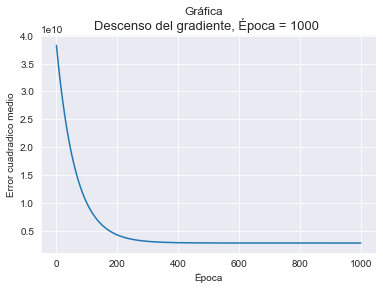

In [78]:
# variable p = predicción del modelo
p = pasos(1000,0.0001,200,  X_entrenamiento[:,0], y_entrenamiento[:,0] )

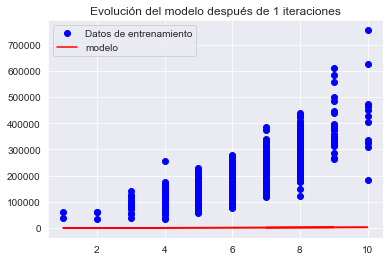

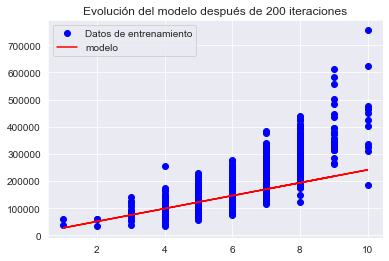

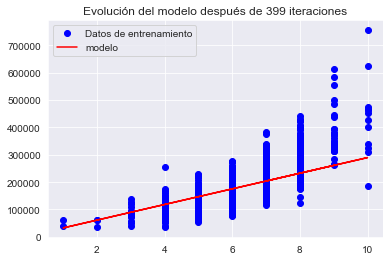

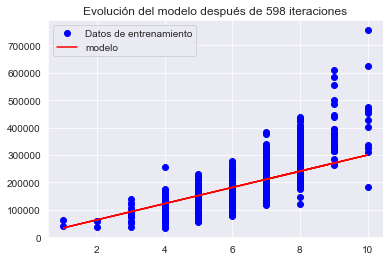

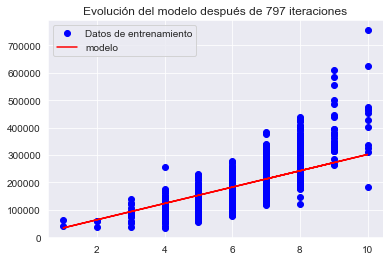

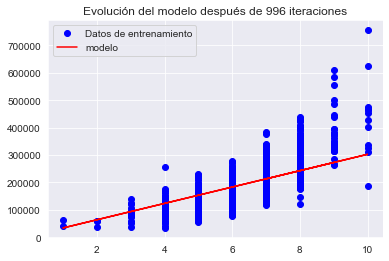

In [79]:
# Plot de la ovolución del modelo en el tiempo

plot_evolucion_modelo(p[4] , p[5], X_entrenamiento[:,0], y_entrenamiento[:,0], 199 )

#### Verificación de resultados, gráfica de entrenamiento y prueba

In [28]:
def plot_ver_resultados(beta0, beta1, data_x , data_y, label_ , condicion_, data_x2=0):
    x_p = data_x
    y_estimada = beta0 + beta1 * data_x
    condicion = condicion_
    if condicion == "entrenamiento":
        plt.scatter(x_p, data_y   , label = label_ )
        plt.plot(x_p , y_estimada,'r', label='modelo')
    else:
        plt.scatter(data_x2, data_y ,label = label_)
        plt.plot(x_p , y_estimada,'r', label='modelo')
    
    plt.title("Gráfica de dispersión -{label}-".format(label =label_ ) )
    plt.suptitle("Resultado ")
    plt.xlabel('eje x')
    plt.ylabel('Prices Sales')
    plt.legend()
    plt.show()
    # Resultados con el de prueba (test)

##### Plot de la última iteración  (datos de entrenamiento)

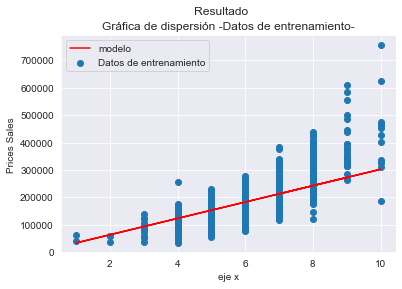

In [80]:
plot_ver_resultados(p[0],p[1],X_entrenamiento[:,0], y_entrenamiento[:,0], 'Datos de entrenamiento', "entrenamiento"  )

##### Plot de la última iteración  (datos de prueba)

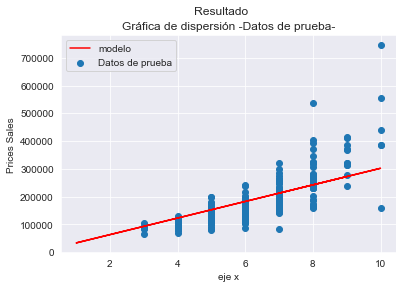

In [82]:
plot_ver_resultados(p[0],p[1],X_entrenamiento[:,0], y_prueba[:,0], 'Datos de prueba',"prueba",x_prueba[:,0])

##### Resultado de las predicciones

In [83]:
def prediccion(x_prueba):
    lista= x_prueba
    y_predictivo = []
    x_valores = []
    for i in range(0 , (len(x_prueba)) ):
        y_predictivo.append((np.array(p[0])).astype(int) + (np.array(p[1]))*list(lista)[i])
        x_valores.append(list(lista)[i] )
    
    df = pd.DataFrame()
    df["y_estimado"] = pd.Series(y_predictivo)
    df["valores_de_x"] = pd.Series(x_valores)
    return df

print((prediccion(x_prueba[:,0])).head(5) )

      y_estimado  valores_de_x
0  182812.114410           6.0
1  182812.114410           6.0
2  152962.928675           5.0
3  212661.300146           7.0
4  182812.114410           6.0


##### Valores de   $ \hat{y} $ (estimado)  y $ {y} $ (prueba)

In [84]:
a = pd.DataFrame (prediccion(x_prueba[:,0]))
a['y_prueba'] = pd.Series(np.squeeze( y_prueba[:,0]))
print(a.head(5))

      y_estimado  valores_de_x  y_prueba
0  182812.114410           6.0  200624.0
1  182812.114410           6.0  133000.0
2  152962.928675           5.0  110000.0
3  212661.300146           7.0  192000.0
4  182812.114410           6.0   88000.0


##### Error de la prediccón ${y}-\hat{y} $ (datos de prueba)

> Este error sirve para validar el modelo, debido a a que se compara con los otros modelos y se toma el que menor error tiene, sin embargo existen otros tipos de validacióm, se puede mencionar el cross validation, en donde se toma muestras aleatorias del set de datos, y luego de varios intentos se calcula el error y se realiza el promedio para validar el modelo.

In [96]:
#función del cálculo del error
def _error(y,y_estimada):
    """Función para obtener el error del modelo """
    N = y.shape[0] # N es el tamaño del dataseto o de las observaciones
    error = np.sum((y-y_estimada)**2)/N
    return error

In [97]:
_error( y_prueba[:,0],  p[0]+p[1]*x_prueba[:,0] ) 

3123234446.803899

## Usando sklearn

> La librería Scikit-learn (también conocida como sklearn) es una librería de aprendizaje automático en Python que proporciona una amplia gama de herramientas para el análisis de datos y el modelado predictivo

In [130]:
# Obteniendo el 80% para el entrenamiento y el 20% prueba

def modelo_sklearn(data_x, data_y, condicion_):
    # Partiendo los datos en el 80% de entrenamiento y 20% prueba
    X_entrenamiento_s, x_prueba_s, y_entrenamiento_s, y_prueba_s = train_test_split(data_x, data_y, test_size =0.2, random_state = 0)

    # Ajustando la regresión lineal simple a los datos de entrenamiento
    regresion = LinearRegression()
    regresion.fit(X_entrenamiento_s, y_entrenamiento_s)

    # Prediccion de los resultados
    y_pred = regresion.predict(x_prueba_s)
    
    condicion = condicion_  

    if condicion == "plot":
        # Resultados con los datos de entrenamiento
        plt.scatter(X_entrenamiento_s, y_entrenamiento_s, color = 'blue')
        plt.plot(X_entrenamiento_s, regresion.predict(X_entrenamiento_s), color = 'red')
        plt.title('Gráfica de dispersión (Entrenamientos)')
        plt.xlabel('Variable independiente')
        plt.ylabel('Sales Prices')
        plt.show()

        # Resultados con los datos de prueba 
        plt.scatter(x_prueba_s, y_prueba_s, color = 'blue')
        plt.plot(X_entrenamiento_s, regresion.predict(X_entrenamiento_s), color = 'red')
        plt.title('Gráfica de dispersión (Prueba)')
        plt.xlabel('Variable independiente')
        plt.ylabel('Sales Prices')
        plt.show()
    
    else:
        return regresion.predict(X_entrenamiento_s)
    

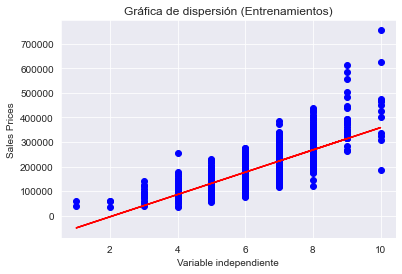

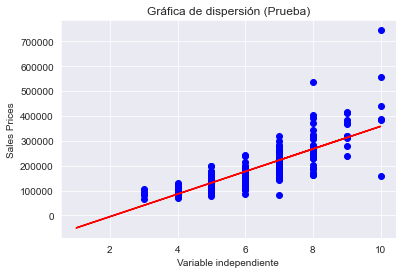

In [138]:
modelo_sklearn(df.iloc[:, 1:2].values, df.iloc[:, :1].values, "plot" )

## Comparación de $ \hat{y} $  del modelo manual vs. sklearn

In [141]:
def comparacion_sklearn_manual(model_sklearn, model_manual ):
    y_estimada_sklearn =   pd.Series(np.squeeze(model_sklearn ))
    y_estimada_manual =  pd.Series( np.squeeze( model_manual))

    df_estimada = pd.DataFrame()
    df_estimada['y_estimada_sklearn'] = y_estimada_sklearn
    df_estimada['y_estimada_manual'] = y_estimada_manual
    df_estimada["X_entrenamiento"] = pd.Series( np.squeeze(X_entrenamiento_s))
    df_estimada["promedio_sk_man"] = (df_estimada.y_estimada_sklearn +  df_estimada.y_estimada_manual)/2 
    
    return df_estimada

In [143]:
print((comparacion_sklearn_manual(modelo_sklearn(df.iloc[:, 1:2].values, df.iloc[:, :1].values, "regres" ) ,\
                           p[0]+p[1]*X_entrenamiento[:,0])).head(5))

   y_estimada_sklearn  y_estimada_manual  X_entrenamiento  promedio_sk_man
0       313043.958877      272360.365410              9.0    292702.162143
1       131497.617451      152963.622469              5.0    142230.619960
2       131497.617451      152963.622469              5.0    142230.619960
3       267657.373521      242511.179675              8.0    255084.276598
4       222270.788164      212661.993939              7.0    217466.391052


In [56]:
# Datos
X_s = df.iloc[:, 1:2].values
y_s = df.iloc[:, :1].values 

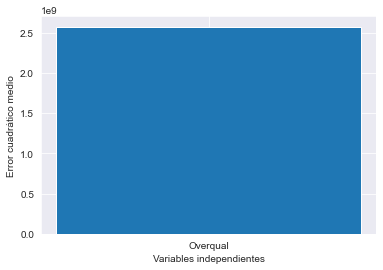

El mejor modelo para la variable "habitaciones" es el modelo 0


In [87]:
# Obteniendo el 80% para el entrenamiento y el 20% prueba

X_entrenamiento_s, x_prueba_s, y_entrenamiento_s, y_prueba_s = train_test_split(X_s, y_s, test_size =0.2, random_state = 0)

# ajustar varios modelos de regresión lineal
model1 = LinearRegression().fit(X_entrenamiento_s, y_entrenamiento_s)

# predecir los valores de validación para cada modelo y calcular el error
y_pred1 = model1.predict(x_prueba_s)
mse1 = mean_squared_error(y_prueba_s, y_pred1)


# graficar los errores para cada modelo
x_labels = ['Overqual']
mse_values = [mse1]
plt.bar(x_labels, mse_values)
plt.xlabel('Variables independientes')
plt.ylabel('Error cuadrático medio')
plt.show()

# seleccionar el mejor modelo para cada variable independiente
best_models = np.argmin([mse1], axis=0)
print('El mejor modelo para la variable "habitaciones" es el modelo', best_models)


In [60]:
mse1

2572969092.6600738